## A/B Testing using Python

A/B Testing means analyzing two marketing strategies to choose the best marketing strategy that can convert more traffic into sales (or more traffic into your desired goal) effectively and efficiently. A/B testing is one of the valuable concepts that every Data Science professional should know.

In A/B testing, we analyze the results of two marketing strategies to choose the best one for future marketing campaigns. For example, when I started an ad campaign on Instagram to promote my Instagram post for the very first time, my target audience was different from the target audience of my second ad campaign. After analyzing the results of both ad campaigns, I always preferred the audience of the second ad campaign as it gave better reach and followers than the first one.

That is what A/B testing means. Your goal can be to boost sales, followers, or traffic, but when we choose the best marketing strategy according to the results of our previous marketing campaigns, it is nothing but A/B testing.

The dataset we are using here contains two data files about two marketing campaigns (Control Campaign and Test Campaign).

**Introduction**<br>
For this project, we will be working to understand the results of an A/B test run by an e-commerce website. The dataset we are using here contains two data files about two marketing campaigns (Control Campaign and Test Campaign). 
Our goal is to work through this notebook to help the company understand if they should:

* Questions<br>
    *Implement the New landing page.<br>
    *Keep the Old landing page.<br>
    *Perhaps run the experiment longer to make their decision.<br>
    
**First of all, let's import the basic and necessary libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
sns.set_style('whitegrid')
pd.options.display.max_colwidth = 18
pd.options.display.max_columns = 50

### &#x0031;&#xFE0F;&#x20E3;   Part I - Data Wrangling & Probability:
We will do the following steps:
* Gathering data from the dataset and investigate it in an effort to    understand more details about it.
* Performing a data assessment to identify any issues with data types, structure, or quality.
* Performing data cleaning by changing data types, replacing values, removing unnecessary data, and modifying the dataset for easier and faster analysis.

`Below is a description of this data set`:<br>
* Campaign Name: Target campaign type for ad landing page.

* Spend [USD]: The amount of money spent on advertising in the campaign.

* of Impressions: The number of people who viewed the ad in the campaign (contains repeated viewing of the same person for the ad).

* Reach: The number of unique people who saw the ad in the campaign.

* of Website Clicks: The number of users who clicked on the website link in the campaign's advertisement.

* of Searches: The number of users who performed a search on the website.

* of View Content: Number of users who have viewed product details.

* of Add to Cart: The number of users who have added the product to the cart.

* of Purchase: The number of users who have purchased the product.

**A.Gathering Data**<br>
Reading in the control group's data set from the control_group.csv file and take a look at the top few rows here:

In [2]:
control_data = pd.read_csv('control_group.csv', sep=';')
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
''' 
The datasets have some errors in column names. 
Let’s give new column names before moving forward:
'''
def to_clean(val):
    return val.strip().lower().replace("# ", "").replace("of ", "").replace(" ","_").replace("[usd]", "usd")

In [4]:
control_data.rename(columns=to_clean, inplace=True)
control_data.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**B.** Reading in the test group's data set from the control_group.csv file and take a look at the top few rows here:

In [5]:
test_data = pd.read_csv('test_group.csv', sep=';')
test_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [6]:
test_data.rename(columns=to_clean, inplace=True)
test_data.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


**C.Assessing Data**<br>
Let's find out the number of rows in the both data set.

In [7]:
#Control data shape
control_data.shape

(30, 10)

In [8]:
#Test data shape
test_data.shape

(30, 10)

Answer:<br>
&#x1F642; That's great, the data set for each campaign is equal in number

**D.Check the basic information of the both data frame.**

In [9]:
#Control data information
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   campaign_name   30 non-null     object 
 1   date            30 non-null     object 
 2   spend_usd       30 non-null     int64  
 3   impressions     29 non-null     float64
 4   reach           29 non-null     float64
 5   website_clicks  29 non-null     float64
 6   searches        29 non-null     float64
 7   view_content    29 non-null     float64
 8   add_to_cart     29 non-null     float64
 9   purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [10]:
#Test data Information
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   campaign_name   30 non-null     object
 1   date            30 non-null     object
 2   spend_usd       30 non-null     int64 
 3   impressions     30 non-null     int64 
 4   reach           30 non-null     int64 
 5   website_clicks  30 non-null     int64 
 6   searches        30 non-null     int64 
 7   view_content    30 non-null     int64 
 8   add_to_cart     30 non-null     int64 
 9   purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


&#x1F642; The control data set has null values, and the data type of the columns from impression to purchase is different from the same columns in the test set, we will deal with this later.

**E.** 
The dataset of the control campaign has missing values in a row. Let’s fill in these missing values by the mean value of each column:


In [11]:
control_data['impressions'].fillna(value=control_data['impressions'].mean(), inplace=True)
control_data['reach'].fillna(value=control_data['reach'].mean(), inplace=True)
control_data['website_clicks'].fillna(value=control_data['website_clicks'].mean(),inplace=True)
control_data['searches'].fillna(value=control_data['searches'].mean(), inplace=True)
control_data['view_content'].fillna(value=control_data['view_content'].mean(), inplace=True)
control_data['add_to_cart'].fillna(value=control_data['add_to_cart'].mean(), inplace=True)
control_data['purchase'].fillna(value=control_data['purchase'].mean(), inplace=True)

**F.** Let's create a **checkpoint** and merge the two sets of data, so that one data set is placed below the other data set, as follows:


In [12]:
# Merge the DataFrames
new_data = control_data.merge(test_data, how='outer').sort_values(['date'])

# Reset the index
new_data = new_data.reset_index(drop=True)

# Display the first few rows
new_data.head()

C:\Users\nelio\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1205: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


In [13]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   campaign_name   60 non-null     object 
 1   date            60 non-null     object 
 2   spend_usd       60 non-null     int64  
 3   impressions     60 non-null     float64
 4   reach           60 non-null     float64
 5   website_clicks  60 non-null     float64
 6   searches        60 non-null     float64
 7   view_content    60 non-null     float64
 8   add_to_cart     60 non-null     float64
 9   purchase        60 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.8+ KB


&#128578;We now see that the data columns in the test group have also been automatically converted from type int64 to the same data type in the control group after they are included in it.

In [14]:
new_data

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,1.08.2019,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000
1,Test Campaign,1.08.2019,3008,39550.000000,35820.000000,3038.000000,1946.000000,1069.000000,894.0,255.000000
2,Test Campaign,10.08.2019,2790,95054.000000,79632.000000,8125.000000,2312.000000,1804.000000,424.0,275.000000
3,Control Campaign,10.08.2019,2149,117624.000000,91257.000000,2277.000000,2475.000000,1984.000000,1629.0,734.000000
4,Test Campaign,11.08.2019,2420,83633.000000,71286.000000,3750.000000,2893.000000,2617.000000,1075.0,668.000000
5,Control Campaign,11.08.2019,2490,115247.000000,95843.000000,8137.000000,2941.000000,2486.000000,1887.0,475.000000
6,Test Campaign,12.08.2019,2831,124591.000000,10598.000000,8264.000000,2081.000000,1992.000000,1382.0,709.000000
7,Control Campaign,12.08.2019,2319,116639.000000,100189.000000,2993.000000,1397.000000,1147.000000,1439.0,794.000000
8,Test Campaign,13.08.2019,1972,65827.000000,49531.000000,7568.000000,2213.000000,2058.000000,1391.0,812.000000
9,Control Campaign,13.08.2019,2697,82847.000000,68214.000000,6554.000000,2390.000000,1975.000000,1794.0,766.000000


**G.Now let's also convert the date data type to match it.**

In [15]:
new_data['date'] = pd.to_datetime(new_data['date'])
new_data.head()

C:\Users\nelio\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13.08.2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\nelio\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14.08.2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\nelio\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15.08.2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\nelio\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16.08.2019' in DD/MM/YYYY format. Provide format or specif

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,2019-01-08,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,2019-01-08,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,2019-10-08,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,2019-10-08,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,2019-11-08,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


In [16]:
# Display the last few rows of a dataset
new_data.tail()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
55,Control Campaign,2019-07-08,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
56,Test Campaign,2019-08-08,2916,33669.0,20149.0,7184.0,2867.0,2194.0,1240.0,431.0
57,Control Campaign,2019-08-08,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
58,Control Campaign,2019-09-08,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
59,Test Campaign,2019-09-08,2652,45511.0,31598.0,8259.0,2899.0,2761.0,1200.0,845.0


**H.Let's check to find out if there are duplicates in the data set:**

In [17]:
new_data.duplicated().sum()

0

🙂Great, there are no duplicates in the data set.

**I.Now lets explore if there are no null null values:**

In [18]:
new_data.isnull().sum()

campaign_name     0
date              0
spend_usd         0
impressions       0
reach             0
website_clicks    0
searches          0
view_content      0
add_to_cart       0
purchase          0
dtype: int64

🙂Great, there are no nulls in the data set.

======================================================================================================================

### &#x0032;&#xFE0F;&#x20E3;Part II - Exploratory Data Analysis(EDA) & Probability

Now we will explore the new_data dataset to answer the following questions:

**A.What is the total number of each campaign?**

In [19]:
new_data.groupby(['campaign_name'])['campaign_name'].count()


campaign_name
Control Campaign    30
Test Campaign       30
Name: campaign_name, dtype: int64

In [20]:
'''
Check uniqu values
'''
print(new_data['campaign_name'].unique())

['Control Campaign' 'Test Campaign']


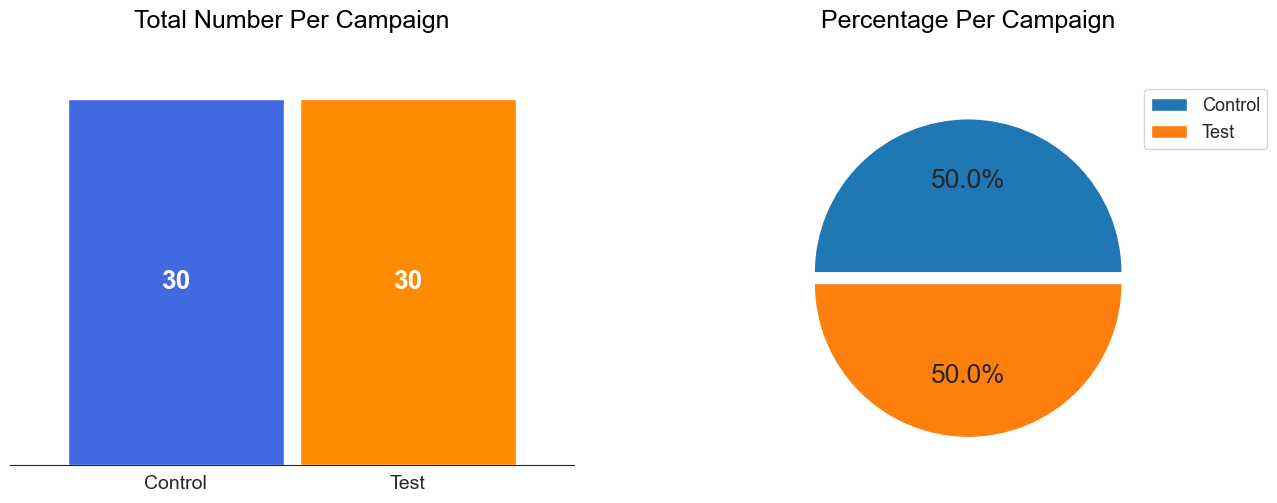

In [21]:
# Set the style to 'white' for the seaborn plots
sns.set_style('white')

# Create a subplot with 1 row and 2 columns, each with a specified size
fig, ax = plt.subplots(1, 2, figsize=(16, 5), sharex=False)

# Define a custom color palette for the bar plot
c = sns.color_palette(['royalblue', 'darkorange'], 2)

# Group data by 'campaign_name' and count the occurrences
campaign = new_data.groupby(['campaign_name'])['campaign_name'].count()

# Plot a bar chart for the total number per campaign
campaign.plot(kind='bar',
              rot=0,
              width=0.93,
              alpha=1,
              fontsize=12,
              color=c, ax=ax[0])

# Annotate each bar with its count
for i, g in enumerate(campaign):
    ax[0].text(i, g - 15, "{:0,.0f}".format(g), color='white', fontsize=19,
               fontweight='bold', ha="center", va='center')

# Set titles, labels, and formatting for the first subplot
ax[0].set_title('Total Number Per Campaign', fontsize=18, color='k', pad=38)
ax[0].set_xlabel('')
ax[0].set_xticklabels(labels=["Control", "Test"], fontsize=14)
ax[0].set_yticks([])
sns.despine(left=True)

# Plot a pie chart for the percentage per campaign in the second subplot
ax[1].pie(campaign, autopct='%1.1f%%', textprops={'fontsize': 19}, explode=(0, 0.07))

# Set titles, legend, and formatting for the second subplot
ax[1].set_title('Percentage Per Campaign', fontsize=18, pad=38, color='k')
ax[1].legend(fontsize=13, labels=['Control', 'Test'], bbox_to_anchor=(1.3, 1))

# Display the plot
plt.show()


Based on these previous results, we find that:<br>
* We see the is no difference between the two campaigns, this can be deceptive, because it suggests that if we do A/B testing there will be no bias in one campaign over another.

* But what interests us more precisely here is the amount of unique individual views for each campaign, so let's explore that.

**B. What is the total number for reach of each campaign?**

In [22]:
reach_sum = new_data.groupby(['campaign_name'])['reach'].sum()

# Round the values to 0 decimal places
rounded_reach_sum = reach_sum.round(0)

# Display the result
print(rounded_reach_sum)

campaign_name
Control Campaign    2665348.0
Test Campaign       1604747.0
Name: reach, dtype: float64


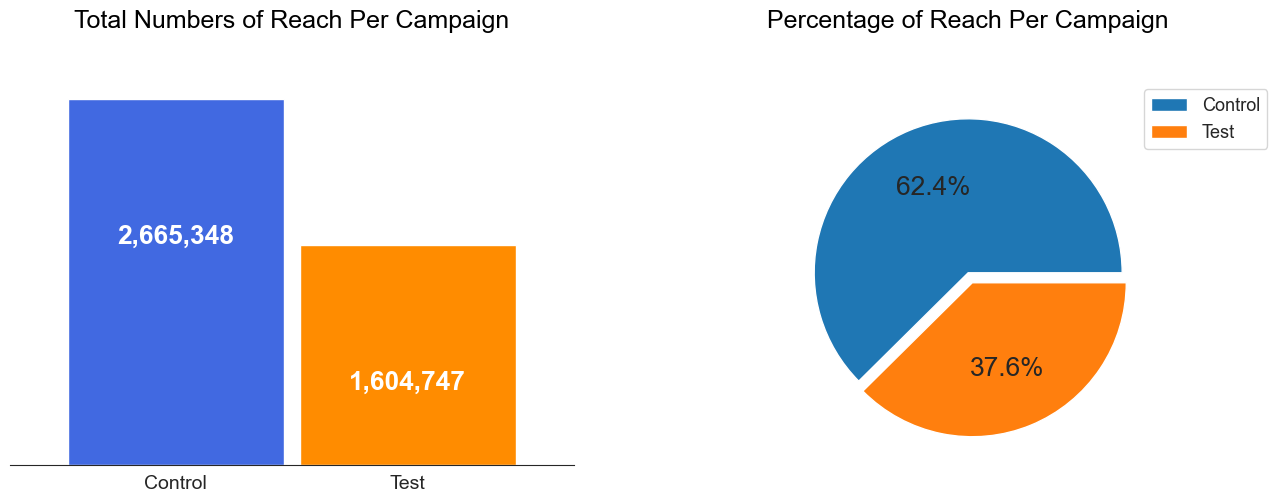

In [23]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plotting style to 'white'
sns.set_style('white')

# Create a subplots figure with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(16, 5), sharex=False)

# Define color palette
c = sns.color_palette(['royalblue', 'darkorange'], 2)

# Group data by campaign_name and calculate the total reach per campaign
campaign2 = new_data.groupby(['campaign_name'])['reach'].sum()

# Plot a bar chart for total reach per campaign
campaign2.plot(kind='bar',
               rot=0,
               width=0.93,
               alpha=1,
               fontsize=12,
               color=c, ax=ax[0])

# Add annotations to display values on top of the bars
for i, g in enumerate(campaign2):
    ax[0].text(i, g - 1000000, "{:0,.0f}".format(g), color='white',
               fontsize=19, fontweight='bold', ha='center', va='center')

# Customize the first subplot
ax[0].set_title("Total Numbers of Reach Per Campaign", fontsize=18, color="k", pad=38)
ax[0].set_xlabel('')
ax[0].set_xticklabels(labels=["Control", "Test"], fontsize=14)
ax[0].set_yticks([])
sns.despine(left=True)

# Plot a pie chart for the percentage of reach per campaign
ax[1].pie(campaign2, autopct='%1.1f%%', textprops={'fontsize': 19}, explode=(0, 0.07))

# Customize the second subplot
ax[1].set_title("Percentage of Reach Per Campaign", fontsize=18, pad=38, color="k")
ax[1].legend(fontsize=13, labels=["Control", "Test"], bbox_to_anchor=(1.3, 1))

# Display the plot
plt.show()


We now see that the rate and number of unique observations in the control is almost twice the rate and the number of observations in the test, which is very likely to result in a bias in the results when we do A / B tests.

**C. Now let's review the click-through rate (CTR) for each campaign.**

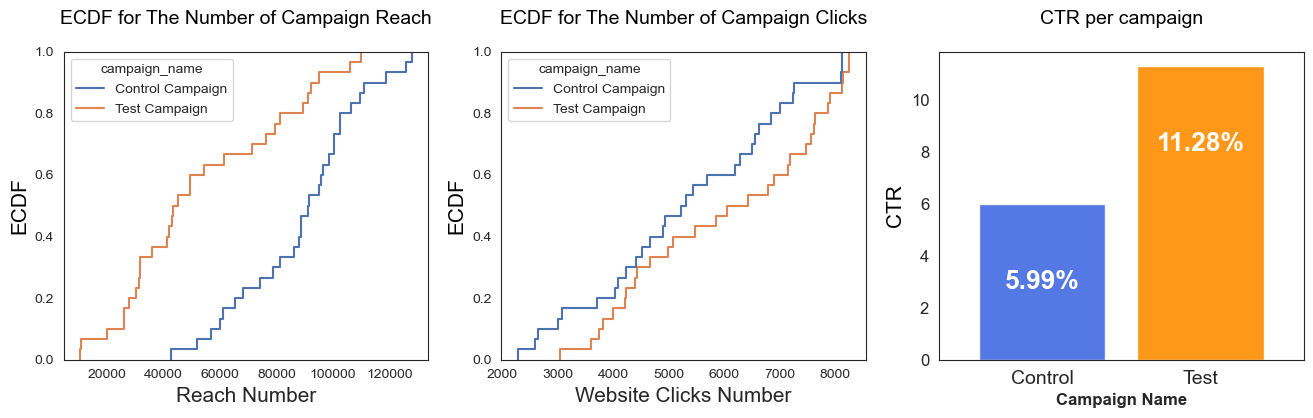

In [24]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style to white
sns.set_style('white')

# Create subplots with a shared x-axis
fig, ax = plt.subplots(1, 3, figsize=(16, 4), sharex=False)

# Plot ECDF for the number of campaign reach
sns.ecdfplot(x='reach',
             data=new_data,
             hue='campaign_name',
             palette='deep', ax=ax[0])

# Set title and axis labels for the first subplot
ax[0].set_title('ECDF for The Number of Campaign Reach', fontsize=14, color='k', pad=20)
ax[0].set_xlabel('Reach Number', fontsize=15)
ax[0].set_ylabel('ECDF', fontsize=15, color='k')

# Plot ECDF for the number of website clicks
sns.ecdfplot(x='website_clicks',
             data=new_data,
             hue='campaign_name',
             palette='deep', ax=ax[1])

# Set title and axis labels for the second subplot
ax[1].set_title('ECDF for The Number of Campaign Clicks', fontsize=14, color='k', pad=20)
ax[1].set_xlabel('Website Clicks Number', fontsize=15)
ax[1].set_ylabel('ECDF', fontsize=15, color='k')

# Set the plotting style to white again (redundant, but included for consistency)
sns.set_style('white')

# Calculate Click-Through Rate (CTR) and plot bar chart
CTR = new_data.groupby(['campaign_name'])['website_clicks'].sum() / new_data.groupby([
    'campaign_name'])['reach'].sum() * 100

CTR.plot(kind='bar',
         rot=0,
         width=0.80,
         alpha=0.9,
         fontsize=12,
         color=c, ax=ax[2])

# Annotate the bar chart with CTR values
for i, g in enumerate(CTR):
    ax[2].text(i, g - 3, "{0:.{digits}f}%".format(g, digits=2), color='white',
               fontsize=19, fontweight='bold', ha='center', va='center')

# Set title and axis labels for the third subplot
ax[2].set_title('CTR per campaign', fontsize=14, color='k', pad=20)
ax[2].set_xlabel('Campaign Name', fontsize=12, fontweight='bold')
ax[2].set_ylabel('CTR', fontsize=15, color='k')
ax[2].set_xticklabels(labels=['Control', 'Test'], fontsize=14);

# Show the plot
plt.show()


* First, we see that the cumulative distribution of reach for the control is 90% greater than the cumulative distribution of the test.


* Second, the cumulative click distribution of the control at 90% is almost equal to the cumulative distribution of the test item at the same level.


* Third, unlike before, when we extracted that the rate of unique views in the control is greater than the test, we divided the number of clicks from them to extract the so-called click-through rate, we found that the click-through rate of the test became significantly greater than the control, and this indicates that There is a high probability that the number of individuals who clicked on the site link on the test is significantly greater than the control, even though the control views are greater than the test.

**D. Now let's make a display of the cumulative distribution of the other columns.**

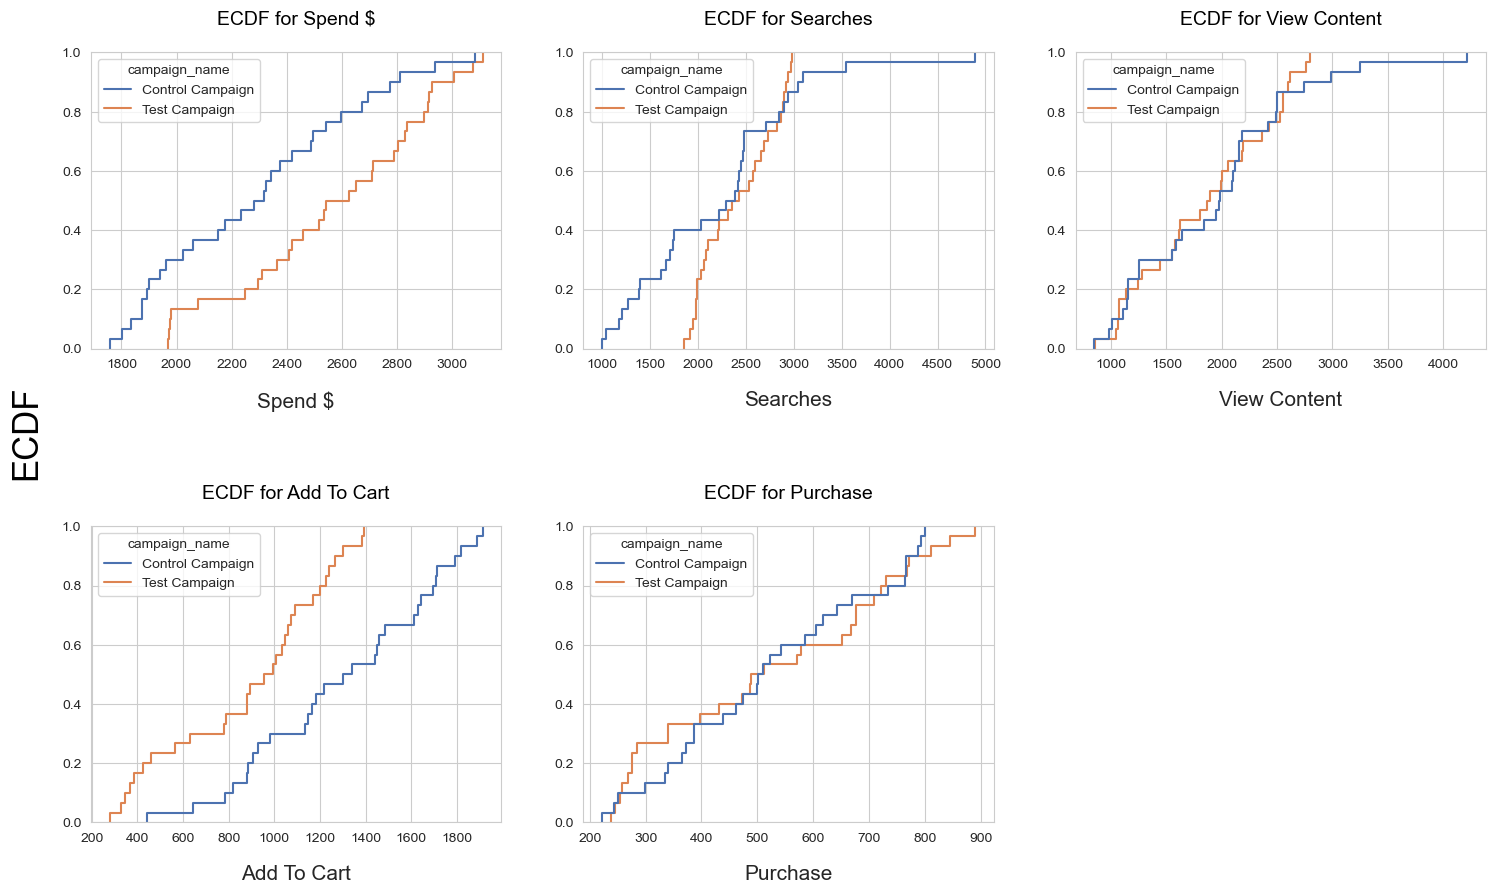

In [25]:
# Set the style for Seaborn plots
sns.set_style('whitegrid')

# Create subplots with a 2x3 grid and specific figure size
fig, ax = plt.subplots(2, 3, figsize=(18, 10), sharex=False)

# Initialize row and column indices
r = 0
c = 0

# Define a dictionary mapping column names to their corresponding campaign metrics
campaign_col = {'Spend $': 'spend_usd',
                'Searches': 'searches',
                'View Content': 'view_content',
                'Add To Cart': 'add_to_cart',
                'Purchase': 'purchase'}

# Iterate through each column in the dictionary
for col in campaign_col:
    # Retrieve the corresponding metric name
    name = campaign_col[col]
    
    # Plot Empirical Cumulative Distribution Function (ECDF) using Seaborn
    sns.ecdfplot(x=name,
                 data=new_data,
                 hue='campaign_name', palette='deep', ax=ax[r, c])
    
    # Set title for the subplot
    ax[r, c].set_title('ECDF for {}'.format(col), fontsize=14,
                       color='k', pad=20)
    
    # Set labels for the x and y axes
    ax[r, c].set_xlabel(col, fontsize=15, labelpad=15)
    ax[r, c].set_ylabel("")
    
    # Update row and column indices for the next subplot
    if c >= 2:
        r += 1
        c = -1
    c += 1

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.2)

# Set label for the entire figure
fig.supylabel('ECDF', fontsize=25, color="k", x= 0.08);

# Remove ticks and spines from the last subplot
ax[1, 2].set_yticks([])
ax[1, 2].set_xticks([])
sns.despine(bottom=True, top=True, left=True, right=True, trim=True, ax=ax[1, 2])

# Display the plot
plt.show()


* The cumulative distribution of spending by about 98% is equal in both groups.
* The cumulative distribution of the number of searchers is about 95% significantly greater in the control group than in the test group.
* The cumulative distribution of the number of people viewing the content was about 95% significantly greater in the control group.
* The cumulative distribution of people who added to the basket was about 95% significantly greater in the control group.
* The cumulative distribution of people who made purchases was about 90% equal in the two groups, but about 95% was slightly greater in the test group

**E.Now let's extract a statistical summary for each category based on the group**

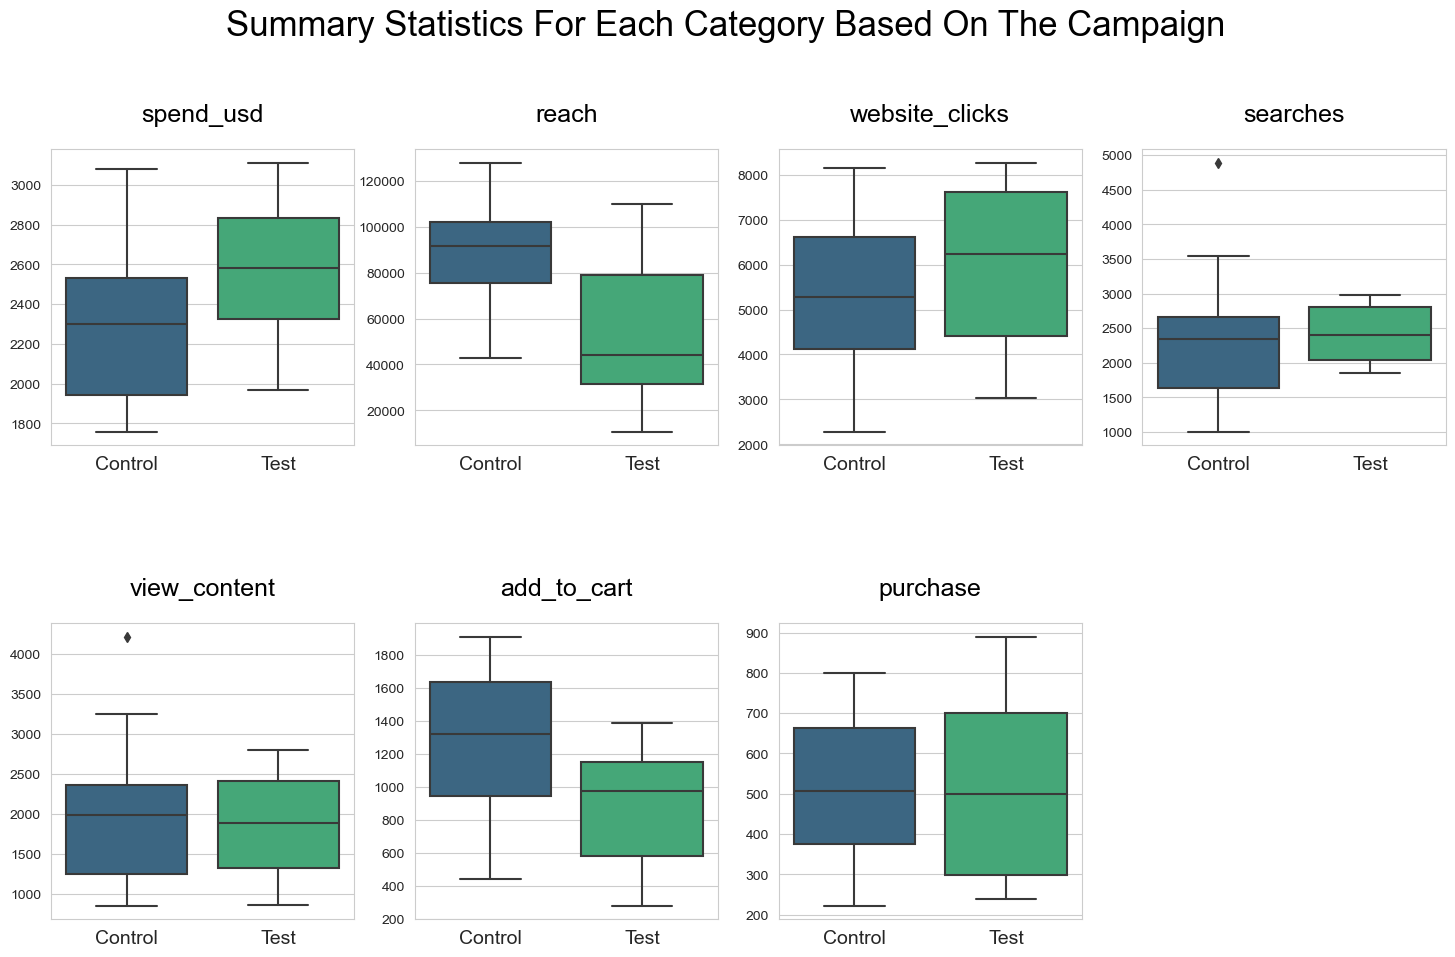

In [26]:
fig, ax = plt.subplots(2,4, figsize=(18,10), sharex=False)

cols = new_data.columns[np.r_[2,4:10]]
r=0
c=0

for col in cols:
    sns.boxplot(x= 'campaign_name',
               y = col,
               data = new_data,
               palette='viridis', ax=ax[r,c])
    ax[r,c].set_title(col, fontsize=18, color="k", pad=20)
    ax[r,c].set_xlabel('')
    ax[r,c].set_ylabel('')
    ax[r,c].set_xticklabels( labels=["Control", "Test"], fontsize=14)
    
    if c>=3:
        r+=1
        c=-1
    c+=1
plt.subplots_adjust(hspace = 0.6, wspace=0.2)
fig.suptitle("Summary Statistics For Each Category Based On The Campaign", 
             fontsize=25, color="k", y=1.02)

ax[1,3].set_yticks([])
ax[1,3].set_xticks([])
sns.despine(bottom=True, top=True, left=True, right=True, trim=True, ax=ax[1,3])

1: spend_usd: We find that the minimum amount of spending for the test group is somewhat greater than that of the control group, as well as the maximum, but to a lesser extent, and that more than 75% of the amount of spending for the test group is greater than 50% of the amount of spending for the control group.


2: reach: We found that the minimum of unique observations in the control group is significantly greater than the minimum in the test, as it is close to the 50% level of viewing in the test, and the maximum in the control is greater than the maximum in the test with a difference of about 10%.


3: website_click: Here we found the opposite that the minimum number of clicks in the control group is smaller than the minimum in the test group by a difference of about 10%, and that 50% of the number of clicks in the test is greater than 50% in the control, and the maximum in the test from the maximum in the control With a very small difference, which explains why the test group's CTR score is greater than the control.

4: searches: Although the minimum number of searches for the test group is greater than the 25% level of the number of research for the control, but we find that the total spread of data for the control is much greater than the test.


5: view_content: We find that the minimum and the first, second and third * quartile levels of the view content numbers for both groups are very close, but the maximum for the control group was greater than the test with a difference of about 10%.

6: add_to_cart: We found here that the minimum number of people who added to cart in the control group is greater than the minimum in the test, and that 25% of the number of people who added to cart in the control group is greater than the maximum in the test.


7: purchase: Here the opposite happened a little, although the minimum and average number of purchases in the two groups are almost close, but that 25% of the maximum number of purchases in the control group is greater than 25% in the test group.

**F.Let's do a time series comparison of the spend vs. click-through rate of the two groups.**

In [27]:
new_data['ctr'] = new_data['website_clicks']/new_data['reach']

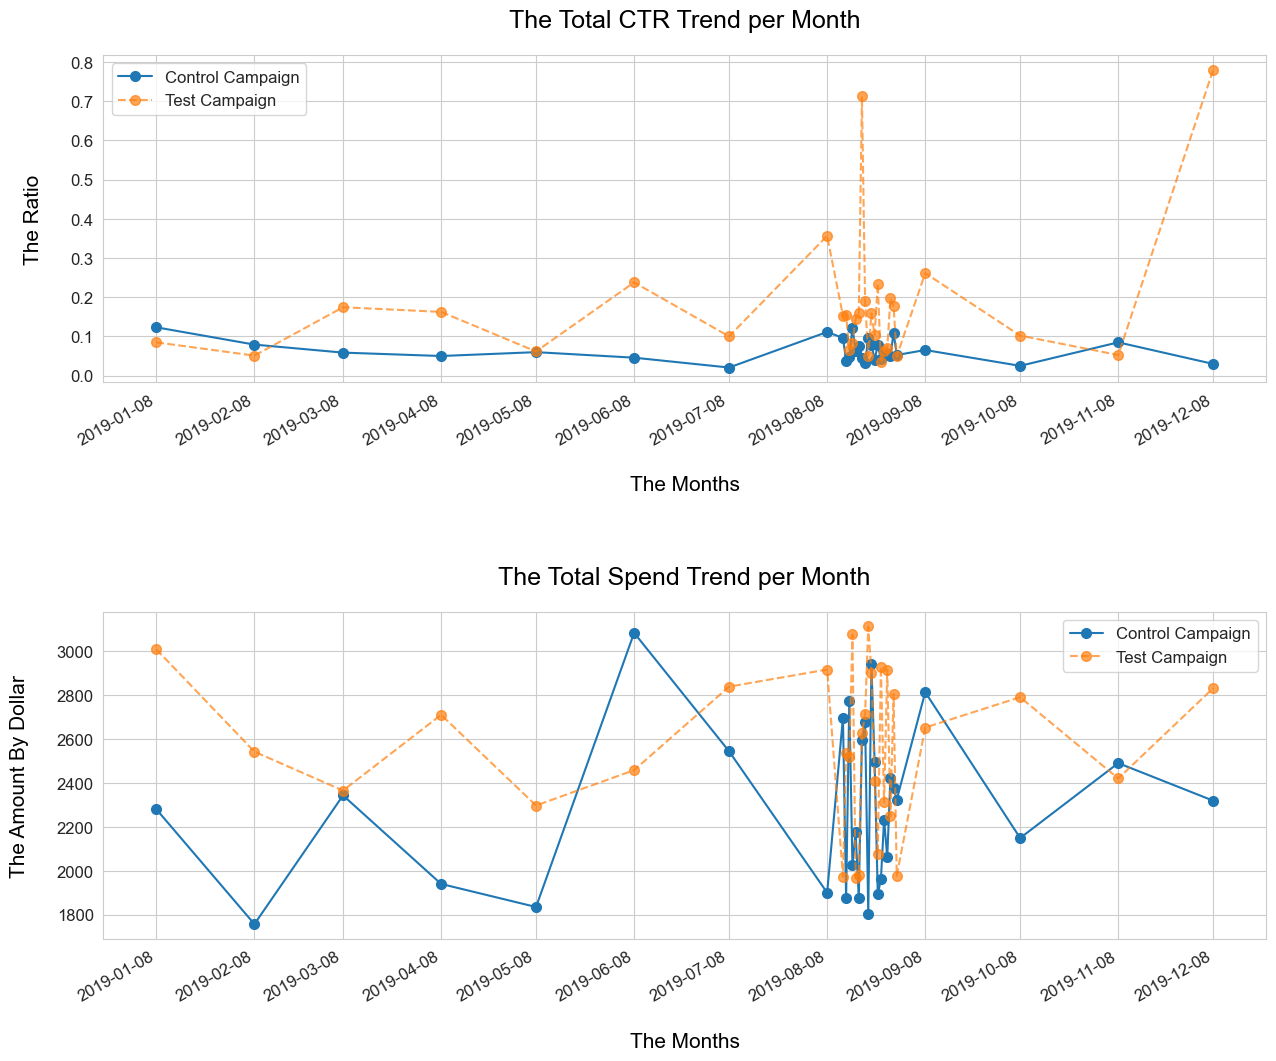

In [28]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

# Setting the plot style
sns.set_style('whitegrid')

# Creating a subplot with 2 rows and 1 column
fig, ax = plt.subplots(2, 1, figsize=(15, 13))

# Grouping data by campaign and date for click-through rate (CTR) and total spend
ctr_total = new_data.groupby(['campaign_name', 'date'])['ctr'].sum()
spend_total = new_data.groupby(['campaign_name', 'date'])['spend_usd'].sum()

# Plotting Control Campaign CTR
ctr_total['Control Campaign'].plot(marker="o", ls='-', markersize=7,
                                   alpha=1, fontsize=12,
                                   label='Control Campaign', ax=ax[0])

# Plotting Test Campaign CTR
ctr_total['Test Campaign'].plot(marker="o", ls='--', markersize=7,
                                alpha=0.7, fontsize=12,
                                label='Test Campaign', ax=ax[0])

# Plotting Control Campaign Spend
spend_total['Control Campaign'].plot(marker="o", ls='-', markersize=7,
                                      alpha=1, fontsize=12,
                                      label='Control Campaign', ax=ax[1])

# Plotting Test Campaign Spend
spend_total['Test Campaign'].plot(marker="o", ls='--', markersize=7,
                                   alpha=0.7, fontsize=12,
                                   label='Test Campaign', ax=ax[1])

# Customizing the first subplot (CTR)
ax[0].set_title("The Total CTR Trend per Month", fontsize=18, color="k", pad=20)
ax[0].set_xlabel('The Months', fontsize=15, color='k', labelpad=20, ha='center')
ax[0].set_ylabel('The Ratio', fontsize=15, color='k', labelpad=20, ha='center')
ax[0].set_xticks(np.array([datetime.datetime(2019, i, 8, 0, 0)
                           for i in range(1, 13, 1)]))
ax[0].legend(fontsize=12)

# Customizing the second subplot (Spend)
ax[1].set_title("The Total Spend Trend per Month", fontsize=18, color="k", pad=20)
ax[1].set_xlabel("The Months", fontsize=15, color="k", labelpad=20, ha="center")
ax[1].set_ylabel("The Amount By Dollar", fontsize=15, color="k", labelpad=20, ha="center")
ax[1].set_xticks(np.array([datetime.datetime(2019, i, 8, 0, 0) for i in range(1, 13, 1)]))
ax[1].legend(fontsize=12)

# Adjusting subplot spacing
plt.subplots_adjust(hspace=0.7, wspace=0.2)


🙂 We find from the beginning of month 1 to the end of month 7 that the spending rate had no significant effect on the click-through rate for the control group and had a slight effect on the test group, but from the beginning of the eighth month the spending rate for each group had a clear effect on the click rate To appear on the same group.

**G.Now let's explore the relationship of each category to spending.**

In [29]:
import seaborn as sns
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt

def hue_regplot(data, x, y, hue, palette=None, **kwargs):
    """
    Generate separate regression plots for different levels of a categorical variable.

    Parameters:
    - data: DataFrame
        The input data.
    - x: str
        The column name for the x-axis variable.
    - y: str
        The column name for the y-axis variable.
    - hue: str
        The column name for the categorical variable to differentiate levels.
    - palette: dict, optional
        A dictionary mapping levels of the hue variable to colors. If not provided,
        a default color palette is used.
    - **kwargs:
        Additional keyword arguments to pass to Seaborn's regplot.

    Returns:
    - regplots: list
        A list of regression plots, one for each level of the categorical variable.
    """
    # Initialize an empty list to store regression plots
    regplots = []

    # Get unique levels of the categorical variable
    levels = data[hue].unique()

    # If no custom color palette is provided, use default colors from 'tab10' colormap
    if palette is None:
        default_colors = get_cmap('tab10')
        palette = {k: default_colors(i) for i, k in enumerate(levels)}

    # Generate a separate regression plot for each level of the categorical variable
    for key in levels:
        regplots.append(
            sns.regplot(
                x=x,
                y=y,
                data=data[data[hue] == key],
                color=palette[key],
                **kwargs
            )
        )

    # Return the list of regression plots
    return regplots            

C:\Users\nelio\AppData\Local\Temp\ipykernel_14368\2028013047.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  default_colors = get_cmap('tab10')


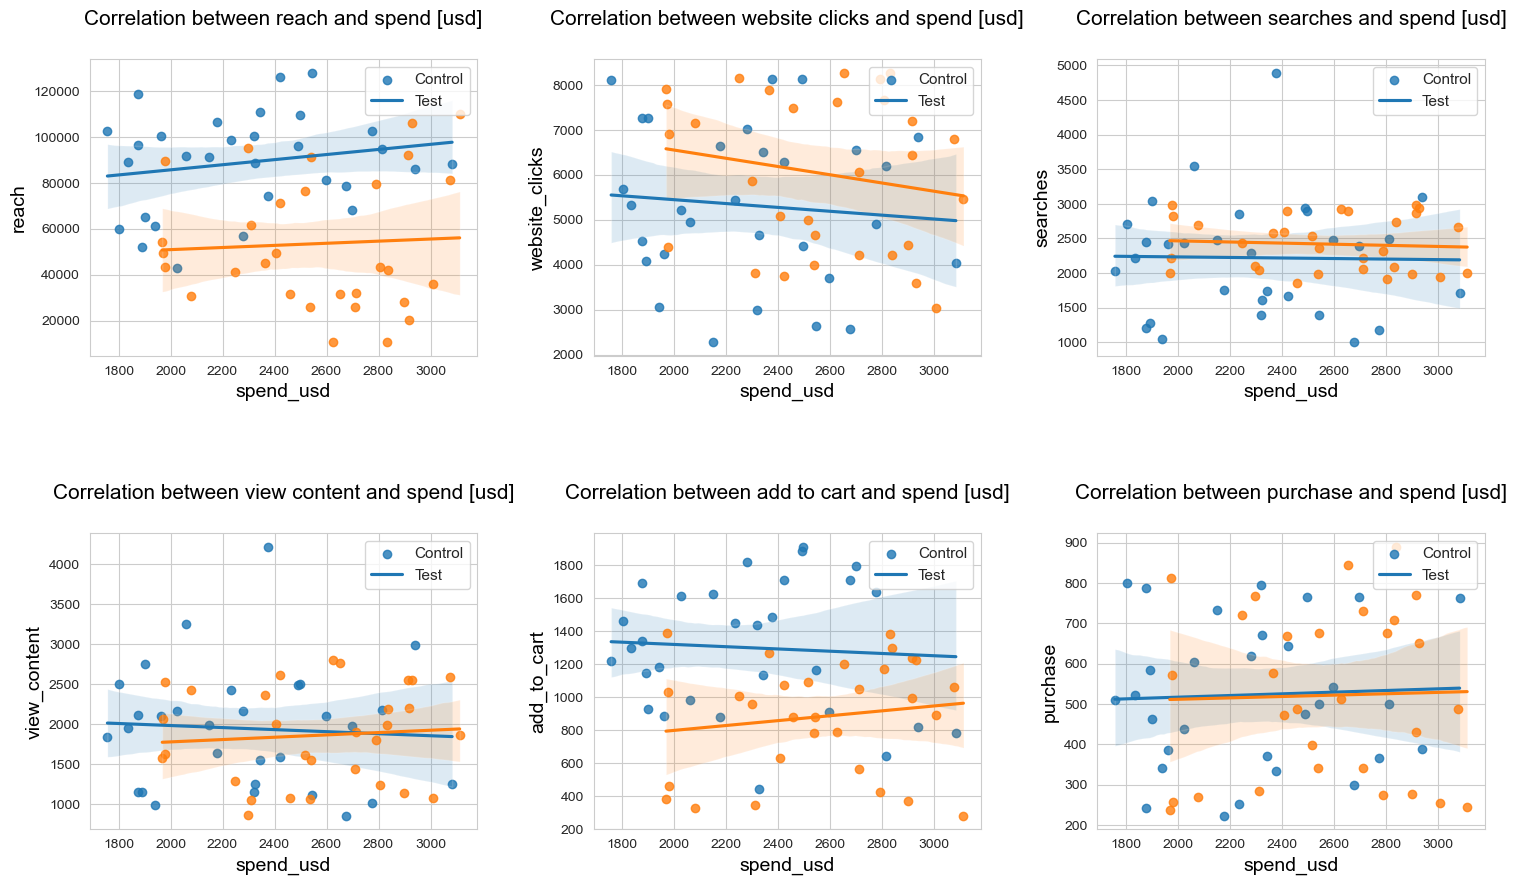

In [30]:
# Set up subplots for a 2x3 grid with specified size
fig, ax = plt.subplots(2, 3, figsize=(18, 10), sharex=False)

# Define a color palette using seaborn
cr = sns.color_palette()

# Select columns of interest from the 'new_data' DataFrame
cols = new_data.columns[4:10]

# Initialize row, column, and iterator variables
r = 0
c = 0
i = 0

# Loop through selected columns and create regression plots
for col in cols:
    hue_regplot(data=new_data, x='spend_usd', y=col, hue='campaign_name',
                ax=ax[r, c])

    # Increment iterator and set subplot titles and labels
    i += 1
    ax[r, c].set_title("Correlation between {} and spend_[usd]".format(col).replace("_", " "),
                      fontsize=15, color="k", pad=25)
    ax[r, c].set_xlabel("spend_usd", fontsize=14, color="k")
    ax[r, c].set_ylabel(col, fontsize=14, color="k")
    ax[r, c].legend(['Control', 'Test'], loc='upper right', fontsize=11)

    # Adjust row and column indices for subplots
    if c >= 2:
        r += 1
        c = -1
    c += 1

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.3)


🙂 We find that the only apparent and logical relationship with spending is for each of the two categories(reach and website_ clicks).


=========================================================================================================================

### &#x0033;&#xFE0F;&#x20E3; Part III - A/B Test
Since a timestamp is associated with each event, we could run a hypothesis test continuously as long as we observe the events.

However, then the hard questions would be:
* Do we stop as soon as one landing pages is considered significantly better than another or does it need to happen consistently for a certain amount of time?
* How long do we run to render a decision that neither page is better than another?

These questions are the difficult parts associated with A/B tests in general. But for now, let's keep in mind that we need to make the decision based only on all the data provided.

So, if we want to make the basic assumption that the old landing page is still better than the new landing page, unless we prove that the new page is definitely better, and besides being able to commit a type 1 error rate "α" of 0.05 or 5%, it will be Our null hypothesis and alternative hypothesis (H0 and H1), are as follows:
1. The Null Hypotheses: `P_new - P_old <= 0:
    H0 : Pnew − Pold ≤ 0`
 
2. The Alternative Hypotheses: `P_new - P_old > 0:
    H1:Pnew−Pold>0`
 
**In this section, we will:**<br>
* Simulate (bootstrap) sample data set for both groups, and compute the "converted" probability p for those samples.
* Use a sample size for each group equal to the ones in the new_df data.
* Compute the difference in the "converted" probability for the two samples above.
* Perform the sampling distribution for the "difference in the probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate.

**A. We will first do A/B tests on the click-through rate (CTR), as follows:**

In [31]:
# Calculate the total reach for the Control Campaign
control_campaign_reach = new_data.loc[new_data['campaign_name'] == 'Control Campaign']['reach'].sum()

# Calculate the total number of website clicks for the Control Campaign
control_campaign_clicks = new_data.loc[new_data['campaign_name'] == 'Control Campaign']['website_clicks'].sum()

# Calculate the Click-Through Rate (CTR) for the Control Campaign
ctr_control_campaign = control_campaign_clicks / control_campaign_reach


In [32]:
# Calculate the total reach for the Test Campaign
test_campaign_reach = new_data.loc[new_data['campaign_name'] == 'Test Campaign']['reach'].sum()

# Calculate the total number of website clicks for the Test Campaign
test_campaign_clicks = new_data.loc[new_data['campaign_name'] == 'Test Campaign']['website_clicks'].sum()

# Calculate the Click-Through Rate (CTR) for the Test Campaign
ctr_test_campaign = test_campaign_clicks / test_campaign_reach


In [33]:
# Calculate the observed difference in Click-Through Rates (CTR) between the Test and Control Campaigns
observed_diff_ctr = ctr_test_campaign - ctr_control_campaign

# Display the observed difference in CTR
observed_diff_ctr


0.05288313170484362

In [34]:
# Initialize an empty list to store the differences in Click-Through Rates (CTR) for each bootstrap iteration
diffs_ctr = []

# Perform bootstrap sampling 10,000 times
for i in range(10000):
    # Create a bootstrap sample by randomly sampling with replacement from the original data
    b_sample = new_data.sample(new_data.shape[0], replace=True)
    
    # Calculate reach, clicks, and CTR for the Control Campaign in the bootstrap sample
    samp_rh_cont= b_sample.loc[b_sample['campaign_name']=='Control Campaign']["reach"].sum()
    samp_ck_cont= b_sample.loc[b_sample['campaign_name']=='Control Campaign']["website_clicks"].sum()
    samp_ctr_cont= samp_ck_cont / samp_rh_cont
    
    # Calculate reach, clicks, and CTR for the Test Campaign in the bootstrap sample
    samp_rh_test= b_sample.loc[b_sample['campaign_name']=='Test Campaign']["reach"].sum()
    samp_ck_test= b_sample.loc[b_sample['campaign_name']=='Test Campaign']["website_clicks"].sum()
    samp_ctr_test= samp_ck_test / samp_rh_test
    
    # Calculate the ratio of CTR for the Test Campaign to CTR for the Control Campaign and append to the list
    diffs_ctr.append(samp_ctr_test - samp_ctr_cont)


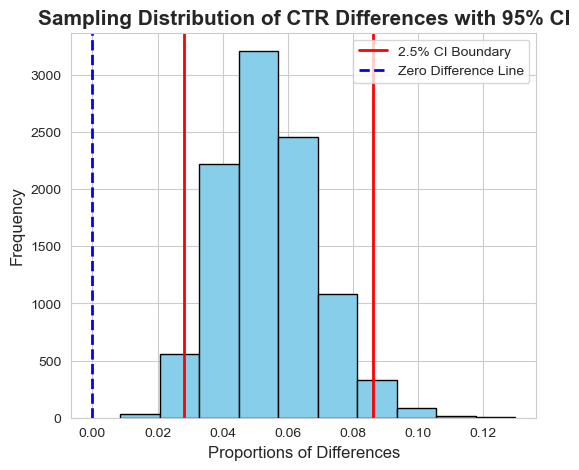

In [35]:
# Convert the list of differences in Click-Through Rates (CTR) to a NumPy array
diffs_ctr = np.array(diffs_ctr)

# Calculate the 95% confidence interval for the differences in CTR
low, high = np.percentile(diffs_ctr, 2.5), np.percentile(diffs_ctr, 97.5)

# Plot the histogram of the sampling distribution
plt.figure(figsize=(6, 5))
plt.hist(diffs_ctr, color='skyblue', edgecolor='black')
plt.title('Sampling Distribution of CTR Differences with 95% CI', fontsize=15, fontweight="bold")
plt.xlabel('Proportions of Differences', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add vertical lines for the confidence interval boundaries and the zero difference line
plt.axvline(x=low, color='r', linewidth=2, label='2.5% CI Boundary')
plt.axvline(x=high, color='r', linewidth=2)
plt.axvline(x=0, color='b', linewidth=2, linestyle='--', label='Zero Difference Line')

# Display legend
plt.legend()

# Show the plot
plt.show()


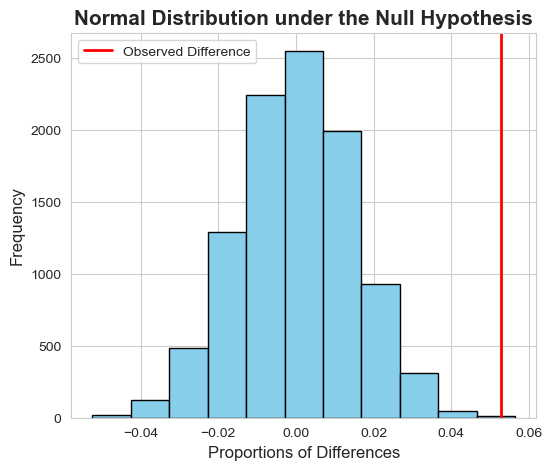

In [37]:
'''
Looking at the sampling distribution as a normal distribution under the null hypothesis through the histogram
'''
# Generate a normal distribution under the null hypothesis with mean 0 and standard deviation from bootstrap differences
null_vals = np.random.normal(0, diffs_ctr.std(), diffs_ctr.size)

# Plot the histogram of the null distribution
plt.figure(figsize=(6, 5))
plt.hist(null_vals, bins=11, color='skyblue', edgecolor='black')
plt.axvline(observed_diff_ctr, c="red", linewidth=2, label='Observed Difference')

# Add title and labels to the axes
plt.title('Normal Distribution under the Null Hypothesis', fontsize=15, fontweight="bold")
plt.xlabel('Proportions of Differences', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [39]:
# Calculate the p-value by determining the proportion of null values greater than the observed difference
p_value = (null_vals > observed_diff_ctr).mean()

# Print the p-value
print('The p-value is: {:.4f}'.format(p_value))

The p-value is: 0.0002


🙂Here the result of the p-value says we reject the null hypothesis that says that the click-through rate of the test group is less than or equal to the rate of the control group, and therefore we accept the hypothesis that the click-through rate of the test group is greater than the control group.

**B.Now let's do A/B tests for average search, content viewing, adding to cart and purchasing.**

**Search:**

In [50]:
'''
Search:
'''
# Calculate the mean number of searches for the Control Campaign
search_cont = new_data.loc[new_data['campaign_name'] == 'Control Campaign']['searches'].mean()

# Calculate the mean number of searches for the Test Campaign
search_test = new_data.loc[new_data['campaign_name'] == 'Test Campaign']['searches'].mean()

# Calculate the observed difference in the mean number of searches between the Test and Control Campaigns
obs_diff_searches = search_test - search_cont

# Print or use the observed difference in searches as needed
print('Observed Difference in Mean Searches: {:.4f}'.format(obs_diff_searches))


Observed Difference in Mean Searches: 197.6563


In [45]:
# Initialize an empty list to store the differences in mean searches for each bootstrap iteration
diffs_srch = []

# Perform bootstrap sampling 10,000 times
for i in range(10000):
    # Create a bootstrap sample by randomly sampling with replacement from the original data
    b_sample = new_data.sample(new_data.shape[0], replace=True)
    
    # Calculate the mean number of searches for the Control Campaign in the bootstrap sample
    samp_srh_cont = b_sample.loc[b_sample['campaign_name'] == 'Control Campaign']['searches'].mean()
    
    # Calculate the mean number of searches for the Test Campaign in the bootstrap sample
    samp_srh_test = b_sample.loc[b_sample['campaign_name'] == 'Test Campaign']['searches'].mean()
    
    # Calculate and append the difference in mean searches to the list
    diffs_srch.append(samp_srh_test - samp_srh_cont)


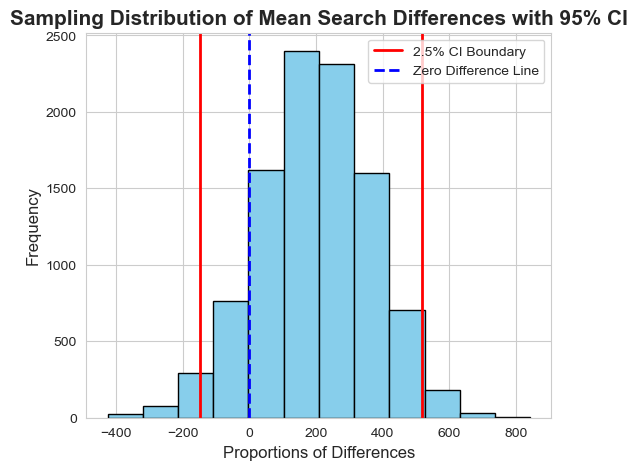

In [49]:
# Convert the list of differences in mean searches to a NumPy array
diffs_srch = np.array(diffs_srch)

# Calculate the 95% confidence interval for the differences in mean searches
low, high = np.percentile(diffs_srch, 2.5), np.percentile(diffs_srch, 97.5)

# Plot the histogram of the sampling distribution
plt.figure(figsize=(6, 5))
plt.hist(diffs_srch, bins=12, color='skyblue', edgecolor='black')
plt.title('Sampling Distribution of Mean Search Differences with 95% CI', fontsize=15, fontweight="bold")
plt.xlabel('Proportions of Differences', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add vertical lines for the confidence interval boundaries and the zero difference line
plt.axvline(x=low, color='r', linewidth=2, label='2.5% CI Boundary')
plt.axvline(x=high, color='r', linewidth=2)
plt.axvline(x=0, color='b', linewidth=2, linestyle='--', label='Zero Difference Line')

# Display legend
plt.legend()

# Show the plot
plt.show()


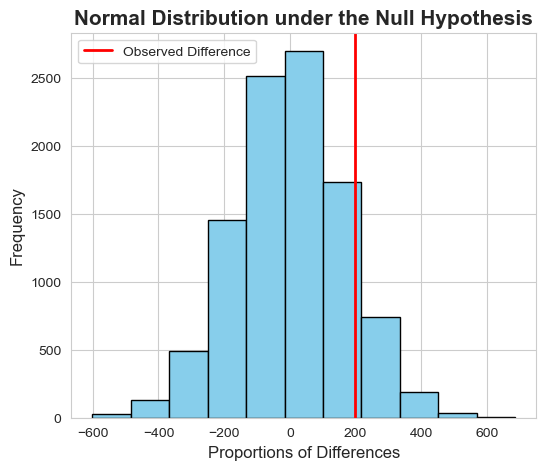

In [52]:
#Looking at the sampling distribution as a normal distribution under the null hypothesis through the histogram
# Generate a normal distribution under the null hypothesis with mean 0 and standard deviation from bootstrap differences
null_vals = np.random.normal(0, diffs_srch.std(), diffs_srch.size)

# Plot the histogram of the null distribution
plt.figure(figsize=(6, 5))
plt.hist(null_vals, bins=11, color='skyblue', edgecolor='black')
plt.axvline(obs_diff_searches, c="red", linewidth=2, label='Observed Difference')

# Add title and labels to the axes
plt.title('Normal Distribution under the Null Hypothesis', fontsize=15, fontweight="bold")
plt.xlabel('Proportions of Differences', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display legend
plt.legend()

# Show the plot
plt.show()

In [54]:
# Calculate the p-value by determining the proportion of null values greater than the observed difference
p_value = (null_vals > obs_diff_searches).mean()

# Print the p-value
print('The p-value is: {:.4f}'.format(p_value))

The p-value is: 0.1205


**Content viewing:**

In [56]:
# Calculate the mean number of "view content" actions for the Control Campaign
view_cont = new_data.loc[new_data['campaign_name'] == 'Control Campaign']['view_content'].mean()

# Calculate the mean number of "view content" actions for the Test Campaign
view_test = new_data.loc[new_data['campaign_name'] == 'Test Campaign']['view_content'].mean()

# Calculate the observed difference in the mean number of "view content" actions between the Test and Control Campaigns
obs_diff_view_content = view_test - view_cont

# Print or use the observed difference in "view content" actions as needed
print('Observed Difference in Mean View Content Actions: {:.4f}'.format(obs_diff_view_content))


Observed Difference in Mean View Content Actions: -85.7931


In [59]:
# Initialize an empty list to store the differences in mean view content actions for each bootstrap iteration
diffs_view = []

# Perform bootstrap sampling 10,000 times
for i in range(10000):
    # Create a bootstrap sample by randomly sampling with replacement from the original data
    b_sample = new_data.sample(new_data.shape[0], replace=True)
    
    # Calculate the mean number of "view content" actions for the Control Campaign in the bootstrap sample
    samp_vi_cont = b_sample.loc[b_sample['campaign_name'] == 'Control Campaign']['view_content'].mean()
    
    # Calculate the mean number of "view content" actions for the Test Campaign in the bootstrap sample
    samp_vi_test = b_sample.loc[b_sample['campaign_name'] == 'Test Campaign']['view_content'].mean()
    
    # Calculate and append the difference in mean "view content" actions to the list
    diffs_view.append(samp_vi_test - samp_vi_cont)


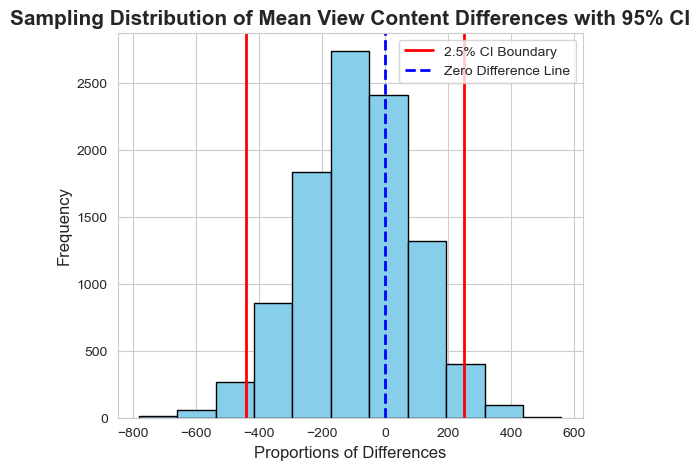

In [60]:
# Convert the list of differences in mean "view content" actions to a NumPy array
diffs_view = np.array(diffs_view)

# Calculate the 95% confidence interval for the differences in mean "view content" actions
low, high = np.percentile(diffs_view, 2.5), np.percentile(diffs_view, 97.5)

# Plot the histogram of the sampling distribution
plt.figure(figsize=(6, 5))
plt.hist(diffs_view, bins=11, color='skyblue', edgecolor='black')
plt.title('Sampling Distribution of Mean View Content Differences with 95% CI', fontsize=15, fontweight="bold")
plt.xlabel('Proportions of Differences', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add vertical lines for the confidence interval boundaries and the zero difference line
plt.axvline(x=low, color='r', linewidth=2, label='2.5% CI Boundary')
plt.axvline(x=high, color='r', linewidth=2)
plt.axvline(x=0, color='b', linewidth=2, linestyle='--', label='Zero Difference Line')

# Display legend
plt.legend()

# Show the plot
plt.show()


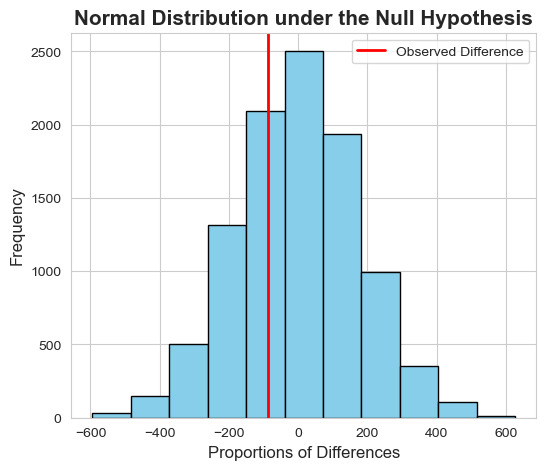

In [62]:
'''
Looking at the sampling distribution as a normal distribution under the null hypothesis through the histogram
'''

# Generate a normal distribution under the null hypothesis with mean 0 and standard deviation from bootstrap differences
null_vals = np.random.normal(0, diffs_view.std(), diffs_view.size)

# Plot the histogram of the null distribution
plt.figure(figsize=(6, 5))
plt.hist(null_vals, bins=11, color='skyblue', edgecolor='black')
plt.axvline(obs_diff_view_content, c="red", linewidth=2, label='Observed Difference')

# Add title and labels to the axes
plt.title('Normal Distribution under the Null Hypothesis', fontsize=15, fontweight="bold")
plt.xlabel('Proportions of Differences', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display legend
plt.legend()

# Show the plot
plt.show()


In [64]:
# Calculate the p-value by determining the proportion of null values greater than the observed difference
p_value = (null_vals > obs_diff_view_content).mean()

# Print the p-value
print('The p-value is: {:.4f}'.format(p_value))

The p-value is: 0.6908


**Add_to_cart:**

In [65]:
# Calculate the mean number of "add to cart" actions for the Control Campaign
cart_cont = new_data.loc[new_data['campaign_name'] == 'Control Campaign']['add_to_cart'].mean()

# Calculate the mean number of "add to cart" actions for the Test Campaign
cart_test = new_data.loc[new_data['campaign_name'] == 'Test Campaign']['add_to_cart'].mean()

# Calculate the observed difference in the mean number of "add to cart" actions between the Test and Control Campaigns
obs_diff_add_to_cart = cart_test - cart_cont

# Print or use the observed difference in "add to cart" actions as needed
print('Observed Difference in Mean Add to Cart Actions: {:.4f}'.format(obs_diff_add_to_cart))


Observed Difference in Mean Add to Cart Actions: -418.4667


In [66]:
# Initialize an empty list to store the differences in mean add to cart actions for each bootstrap iteration
diffs_cart = []

# Perform bootstrap sampling 10,000 times
for i in range(10000):
    # Create a bootstrap sample by randomly sampling with replacement from the original data
    b_sample = new_data.sample(new_data.shape[0], replace=True)
    
    # Calculate the mean number of "add to cart" actions for the Control Campaign in the bootstrap sample
    samp_ct_cont = b_sample.loc[b_sample['campaign_name'] == 'Control Campaign']['add_to_cart'].mean()
    
    # Calculate the mean number of "add to cart" actions for the Test Campaign in the bootstrap sample
    samp_ct_test = b_sample.loc[b_sample['campaign_name'] == 'Test Campaign']['add_to_cart'].mean()
    
    # Calculate and append the difference in mean "add to cart" actions to the list
    diffs_cart.append(samp_ct_test - samp_ct_cont)


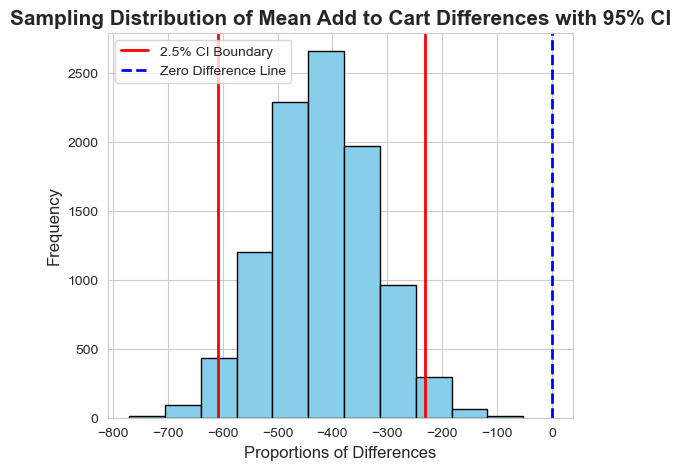

In [67]:
# Convert the list of differences in mean "add to cart" actions to a NumPy array
diffs_cart = np.array(diffs_cart)

# Calculate the 95% confidence interval for the differences in mean "add to cart" actions
low, high = np.percentile(diffs_cart, 2.5), np.percentile(diffs_cart, 97.5)

# Plot the histogram of the sampling distribution
plt.figure(figsize=(6, 5))
plt.hist(diffs_cart, bins=11, color='skyblue', edgecolor='black')
plt.title('Sampling Distribution of Mean Add to Cart Differences with 95% CI', fontsize=15, fontweight="bold")
plt.xlabel('Proportions of Differences', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add vertical lines for the confidence interval boundaries and the zero difference line
plt.axvline(x=low, color='r', linewidth=2, label='2.5% CI Boundary')
plt.axvline(x=high, color='r', linewidth=2)
plt.axvline(x=0, color='b', linewidth=2, linestyle='--', label='Zero Difference Line')

# Display legend
plt.legend()

# Show the plot
plt.show()


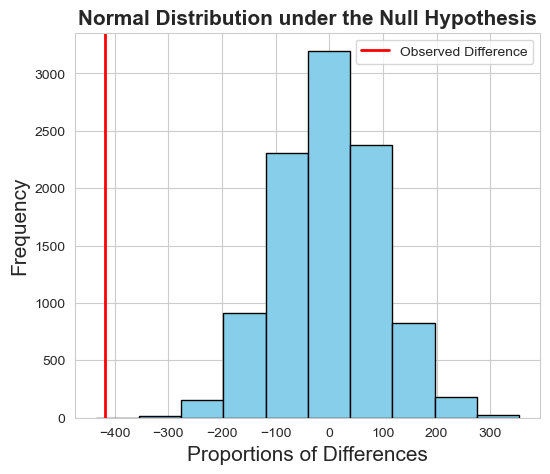

In [72]:
'''
Looking at the sampling distribution as a normal distribution under the null hypothesis through the histogram
'''
# Generate a normal distribution under the null hypothesis with mean 0 and standard deviation from bootstrap differences
null_vals = np.random.normal(0, diffs_cart.std(), diffs_cart.size)

# Plot the histogram of the null distribution
plt.figure(figsize=(6, 5))
plt.hist(null_vals,color='skyblue', edgecolor='black')
plt.axvline(obs_diff_add_to_cart, c="red", linewidth=2, label='Observed Difference')

# Add title and labels to the axes
plt.title('Normal Distribution under the Null Hypothesis', fontsize=15, fontweight="bold")
plt.xlabel('Proportions of Differences', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

# Display legend
plt.legend()

# Show the plot
plt.show()


In [75]:
# Calculate the p-value by determining the proportion of null values greater than the observed difference
p_value = (null_vals > obs_diff_add_to_cart).mean()

# Print the p-value
print('The p-value is: {:.1f}'.format(p_value))

The p-value is: 1.0


**Purchase:**

In [76]:
# Calculate the mean number of "purchase" actions for the Control Campaign
pur_cont = new_data.loc[new_data['campaign_name'] == 'Control Campaign']['purchase'].mean()

# Calculate the mean number of "purchase" actions for the Test Campaign
pur_test = new_data.loc[new_data['campaign_name'] == 'Test Campaign']['purchase'].mean()

# Calculate the observed difference in the mean number of "purchase" actions between the Test and Control Campaigns
obs_diff_purchase = pur_test - pur_cont

# Print or use the observed difference in "purchase" actions as needed
print('Observed Difference in Mean Purchase Actions: {:.4f}'.format(obs_diff_purchase))


Observed Difference in Mean Purchase Actions: -1.5598


In [77]:
# Initialize an empty list to store the differences in mean purchase actions for each bootstrap iteration
diffs_pur = []

# Perform bootstrap sampling 10,000 times
for i in range(10000):
    # Create a bootstrap sample by randomly sampling with replacement from the original data
    b_sample = new_data.sample(new_data.shape[0], replace=True)
    
    # Calculate the mean number of "purchase" actions for the Control Campaign in the bootstrap sample
    samp_pur_cont = b_sample.loc[b_sample['campaign_name'] == 'Control Campaign']['purchase'].mean()
    
    # Calculate the mean number of "purchase" actions for the Test Campaign in the bootstrap sample
    samp_pur_test = b_sample.loc[b_sample['campaign_name'] == 'Test Campaign']['purchase'].mean()
    
    # Calculate and append the difference in mean "purchase" actions to the list
    diffs_pur.append(samp_pur_test - samp_pur_cont)


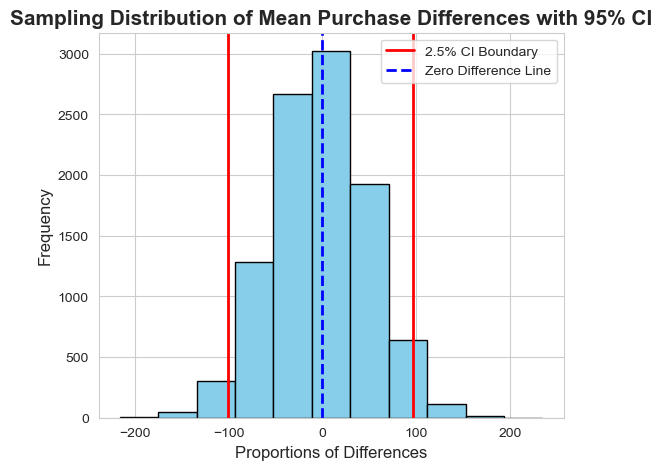

In [82]:
# Convert the list of differences in mean "purchase" actions to a NumPy array
diffs_pur = np.array(diffs_pur)

# Calculate the 95% confidence interval for the differences in mean "purchase" actions
low, high = np.percentile(diffs_pur, 2.5), np.percentile(diffs_pur, 97.5)

# Plot the histogram of the sampling distribution
plt.figure(figsize=(6, 5))
plt.hist(diffs_pur, bins=11, color='skyblue', edgecolor='black')
plt.title('Sampling Distribution of Mean Purchase Differences with 95% CI', fontsize=15, fontweight="bold")
plt.xlabel('Proportions of Differences', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add vertical lines for the confidence interval boundaries and the zero difference line
plt.axvline(x=low, color='r', linewidth=2, label='2.5% CI Boundary')
plt.axvline(x=high, color='r', linewidth=2)
plt.axvline(x=0, color='b', linewidth=2, linestyle='--', label='Zero Difference Line')

# Display legend
plt.legend()

# Show the plot
plt.show()


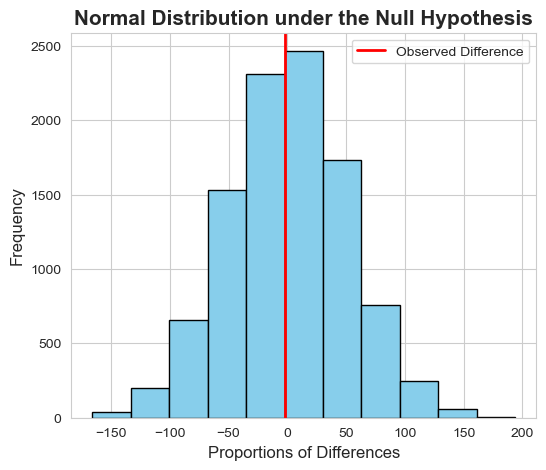

In [81]:
'''
Looking at the sampling distribution as a normal distribution under the null hypothesis through the histogram
'''
# Generate a normal distribution under the null hypothesis with mean 0 and standard deviation from bootstrap differences
null_vals = np.random.normal(0, diffs_pur.std(), diffs_pur.size)

# Plot the histogram of the null distribution
plt.figure(figsize=(6, 5))
plt.hist(null_vals, bins=11, color='skyblue', edgecolor='black')
plt.axvline(obs_diff_purchase, c="red", linewidth=2, label='Observed Difference')

# Add title and labels to the axes
plt.title('Normal Distribution under the Null Hypothesis', fontsize=15, fontweight="bold")
plt.xlabel('Proportions of Differences', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display legend
plt.legend()

# Show the plot
plt.show()


In [83]:
# Calculate the p-value
p_value_purchase = (null_vals > obs_diff_purchase).mean()

# Print the p-value
print("The p-value is: {:.4f}".format(p_value_purchase))


The p-value is: 0.5197


&#x1F642;We find through the results of the probabilistic value of each of the previous four categories that there is no statistical evidence that the average of each of them in the test group is greater than the control group, but this is based on comparing each of them independently with the error rate of the first type by 0.05.


Since each of the previous four categories are related to each other and to be fairer, **we must divide the error rate of the first type among them and at the same time in an unbiased way, so the best way to do this is by using the 'holm–bonferroni' theorem, as follows:**

In [90]:
# Hypothesis beliefs with associated p-values
hb = {'searches': 0.1205,   # First rank
      'purchase': 0.5197,   # Second rank
      'view content': 0.6908,   # Third rank
      'add to cart': 1}   # Fourth rank

# Initialize variables
n = 1
alpha = 0.05

# Iterate over each hypothesis in hb
for key in hb:
    p_value = hb[key]
    
    # Calculate the adjusted significance level for the current test
    hb_rank = alpha / ((len(hb) - n) + 1)
    
    # Increment the test number
    n += 1
    
    # Compare p-value with adjusted significance level and make a decision
    if p_value > hb_rank:
        print("\nThe Rank of {}: p-value({}) > α({}) Fail to Reject Null Hypothesis".
              format(key, np.round(p_value, decimals=3), np.round(hb_rank, decimals=3)))
    else:
        print("\nThe Rank of {}: p-value({}) < α({}) Reject Null Hypothesis".
              format(key, np.round(p_value, decimals=3), np.round(hb_rank, decimals=3)))



The Rank of searches: p-value(0.12) > α(0.012) Fail to Reject Null Hypothesis

The Rank of purchase: p-value(0.52) > α(0.017) Fail to Reject Null Hypothesis

The Rank of view content: p-value(0.691) > α(0.025) Fail to Reject Null Hypothesis

The Rank of add to cart: p-value(1) > α(0.05) Fail to Reject Null Hypothesis


🙂It extracted for us the same previous results that there is no statistical evidence for any group of them that the mean of the test group is greater than the control


========================================================================================================================

### &#x0034;&#xFE0F;&#x20E3; Part IV - A regression approach

**In this final part, we will see the follows:**
* the result you achieved in the A/B test in Part II above can also be achieved by performing regression.
* A/B tests take an aggregate approach to the conclusions reached based on the data set, which aims to understand the parameters of the population (total population values).
* Instead, a machine learning technique such as regression takes a more individualistic and nuanced approach to drawing conclusions, aiming to predict the outcome of each point in a given data set.

🙂 Since the first response variable we'll be working on is the ctr variable, it's a 0 to 1 ratio, so the most appropriate type of regression to use is logistic regression, but before that we're going to convert these rates to just two values either "1" which means that ctr is greater than The mean or "0" means that ctr is equal or less than the mean, then it is a binary categorical variable.

**A.Let's turn ctr into a binary dummy numeric variable**

In [93]:
# Initialize an empty list to store the binary values
ab_ctr = []

# Iterate over each value in the 'ctr' column
for i in new_data['ctr']:
    # Compare the rounded value of 'ctr' with the rounded mean of 'ctr'
    if np.round(i, decimals=3) > np.round(new_data.ctr.mean(), decimals=3):
        # Append 1 if the condition is met
        ab_ctr.append(1)
    else:
        # Append 0 if the condition is not met
        ab_ctr.append(0)

# Add the 'ab_ctr' column to the 'new_data' DataFrame
new_data['ab_ctr'] = ab_ctr

# Display the first few rows of the DataFrame
new_data.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase,ctr,ab_ctr
0,Control Campaign,2019-01-08,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.123239,1
1,Test Campaign,2019-01-08,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,0.084813,0
2,Test Campaign,2019-10-08,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0,0.102032,0
3,Control Campaign,2019-10-08,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0,0.024952,0
4,Test Campaign,2019-11-08,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0,0.052605,0


Our first response variable and its results depend on the expectation variable, which in our case here is represented by both the campaign variable and the spending variable.

But since the campaign variable is a categorical variable, **we will first convert it to a dummy variable so that it becomes a numeric value for use in predictions, as follows:**

In [114]:
# One-hot encode 'campaign_name' column and rename columns
new_data[['control', 'test']] = pd.get_dummies(new_data['campaign_name'])
new_data.drop('control', axis=1, inplace=True)
new_data.rename(columns={'test': 'ab_page'}, inplace=True)  # Rename to avoid conflict

# Display the first few rows of the DataFrame
new_data.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase,ctr,ab_ctr,ab_page
0,Control Campaign,2019-01-08,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.123239,1,0
1,Test Campaign,2019-01-08,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,0.084813,0,1
2,Test Campaign,2019-10-08,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0,0.102032,0,1
3,Control Campaign,2019-10-08,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0,0.024952,0,0
4,Test Campaign,2019-11-08,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0,0.052605,0,1


**B.Let's use statsmodels to instantiate our regression model on the two columns we created in part (a). Above, adding another spending column and then doing a model-fit to predict whether or not an individual will convert.**

In [116]:
import statsmodels.formula.api as smf

# Fit logistic regression model
log_mod = smf.logit(formula="ab_ctr ~ ab_page + spend_usd", data=new_data).fit()

# Display summary statistics
log_mod.summary()


Optimization terminated successfully.
         Current function value: 0.450010
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 ab_ctr   No. Observations:                   60
Model:                          Logit   Df Residuals:                       57
Method:                           MLE   Df Model:                            2
Date:                Wed, 20 Dec 2023   Pseudo R-squ.:                  0.2633
Time:                        18:09:33   Log-Likelihood:                -27.001
converged:                       True   LL-Null:                       -36.652
Covariance Type:            nonrobust   LLR p-value:                 6.434e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5609      2.312      0.243      0.808      -3.971       5.093
ab_page        3.2919      0.942      3.496      0.000       1.446       5.138
spend_usd     -0.0014      0.001     -1.414      0.157      -0.003       0.001
==============================================================================
"""

First, an LLR p-value of 6.434e-05 (0.00006434) indicates that the model is generally statistically significant because it is less than 0.05, which allows us to look at the rest of the results.


Second, if we look at the independent variables represented by the two coefficients (campaign and spending), we find that it is the campaign coefficient that has a significant effect on the log odds of CTR.


So, since the dummy variable "Control" has been dropped from the analysis, it is considered the comparison group and the interpretation of the other category, which is "test".


We can say if the campaign is of the test type compared to the campaign of the control type, there is an ascending ratio of 3.2919 in the log odds of the click-through rate(CTR).

**In fact, the interpretation of log odds is not a very obvious thing to think about its effects, so the easiest way to interpret the results is to convert the logistic regression model coefficients into odds ratio, where we can do this by using the exponential for the coefficient value and confidence intervals, as follows:**

In [118]:
# Create a DataFrame for odds ratios, p-values, and confidence intervals
model_odds = pd.DataFrame(np.exp(log_mod.params), columns=['Odds Ratio'])
model_odds['p-value'] = log_mod.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(log_mod.conf_int())

# Display the DataFrame
model_odds

,Odds Ratio,p-value,2.5%,97.5%
Intercept,1.752179,0.808345,0.018854,162.840991
ab_page,26.893979,0.000473,4.246817,170.312502
spend_usd,0.998554,0.157488,0.996553,1.000559


🙂We can now interpret the result of the coefficient "ab_page", that the campaign with the test type compared to the campaign with the control type is likely to have a greater CTR by a factor of 27.90.

Since the following response variables that we will work on are (search, content viewing, adding to cart and purchasing), the most appropriate type of regression used for them is linear regression.

The second response variable that we will deal with is searches, and if we look at the expectation variables that are likely to be affected by them (ab_page, ab_ctr, spend_usd).

**C.Let's make a fit of the model to the search variable**

In [121]:
import statsmodels.api as sm

# Add an intercept column to the DataFrame
new_data['intercept'] = 1

# Define the independent variables and the dependent variable
independent_vars = ['intercept', 'ab_page', 'ab_ctr', 'spend_usd']
dependent_var = 'searches'

# Fit the linear regression model
lm2 = sm.OLS(new_data[dependent_var], new_data[independent_vars])
results2 = lm2.fit()

# Display the summary of the regression results
results2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               searches   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.5362
Date:                Wed, 20 Dec 2023   Prob (F-statistic):              0.659
Time:                        18:33:24   Log-Likelihood:                -473.63
No. Observations:                  60   AIC:                             955.3
Df Residuals:                      56   BIC:                             963.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2415.8669    588.883      4.102      0.000    1236.192    3595.542
ab_page      272.4532    219.772      1.240      0.220    -167.803     712.709
ab_ctr      -112.1693    223.566     -0.502      0.618    -560.025     335.686
spend_usd     -0.0817      0.250     -0.326      0.745      -0.583       0.420
==============================================================================
Omnibus:                       17.970   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.224
Skew:                           0.936   Prob(JB):                     6.10e-08
Kurtosis:                       6.128   Cond. No.                     1.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
# Create a new column 'ctr_page' by multiplying 'ab_ctr' and 'ab_page'
new_data['ctr_page'] = new_data['ab_ctr'] * new_data['ab_page']

# Display the first few rows of the DataFrame to verify the changes
new_data.head()


,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase,ctr,ab_ctr,ab_page,intercept,ctr_page
0,Control Campaign,2019-01-08,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.123239,1,0,1,0
1,Test Campaign,2019-01-08,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,0.084813,0,1,1,0
2,Test Campaign,2019-10-08,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0,0.102032,0,1,1,0
3,Control Campaign,2019-10-08,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0,0.024952,0,0,1,0
4,Test Campaign,2019-11-08,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0,0.052605,0,1,1,0


In [125]:
# Add an intercept column to the DataFrame
new_data['intercept'] = 1

# Define the independent variables, including 'ctr_page', and the dependent variable
independent_vars = ['intercept', 'ab_page', 'ab_ctr', 'ctr_page', 'spend_usd']
dependent_var = 'searches'

# Fit the linear regression model
lm2 = sm.OLS(new_data[dependent_var], new_data[independent_vars])
results2 = lm2.fit()

# Display the summary of the regression results
results2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               searches   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.4753
Date:                Wed, 20 Dec 2023   Prob (F-statistic):              0.754
Time:                        18:38:40   Log-Likelihood:                -473.46
No. Observations:                  60   AIC:                             956.9
Df Residuals:                      55   BIC:                             967.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2402.5990    593.007      4.052      0.000    1214.186    3591.013
ab_page      322.3903    238.498      1.352      0.182    -155.571     800.352
ab_ctr       134.8345    495.858      0.272      0.787    -858.886    1128.555
ctr_page    -309.0407    552.881     -0.559      0.578   -1417.039     798.958
spend_usd     -0.0831      0.252     -0.330      0.743      -0.588       0.422
==============================================================================
Omnibus:                       19.485   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.346
Skew:                           1.007   Prob(JB):                     7.77e-09
Kurtosis:                       6.298   Cond. No.                     2.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a design matrix and separate dependent (y) and independent variables (x)
y, x = dmatrices("searches ~ ab_page + ab_ctr + ctr_page + spend_usd", new_data, return_type="dataframe")

# Create an empty DataFrame to store VIF values and variable names
vif = pd.DataFrame()

# Calculate VIF for each independent variable
vif["VIF(Variance Inflation Factor)"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Add variable names to the DataFrame
vif["Features"] = x.columns

# Display the VIF DataFrame
vif


,VIF(Variance Inflation Factor),Features
0,46.226816,Intercept
1,1.869322,ab_page
2,6.787454,ab_ctr
3,7.857917,ctr_page
4,1.192233,spend_usd


🙂 From the previous results, we did not find any statistical evidence that any of the previous coefficients had an effect on the search rate, and this is also after we added the so-called interaction process between ab_page and ab_ctr to the logistic regression, and made sure that there was no variance inflation factor(VIFs) that could affect the process results.


The Third response variable that we will deal with is view content, and if we look at the expectation variables that are likely to be affected by them (ab_page, ab_ctr, spend_usd, searches).

**D. Let's make a fit of the model to the view_content variable**

In [134]:
# Add an intercept column to the DataFrame
new_data['intercept'] = 1

# Define the independent variables, including 'ctr_page' and 'searches', and the dependent variable
independent_vars = ['intercept', 'ab_page', 'ab_ctr', 'ctr_page', 'searches', 'spend_usd']
dependent_var = 'view_content'

# Fit the linear regression model
lm3 = sm.OLS(new_data[dependent_var], new_data[independent_vars])
results3 = lm3.fit()

# Display the summary of the regression results
results3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           view_content   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     57.62
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.99e-20
Time:                        18:59:58   Log-Likelihood:                -420.70
No. Observations:                  60   AIC:                             853.4
Df Residuals:                      54   BIC:                             866.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -393.6946    283.049     -1.391      0.170    -961.173     173.784
ab_page     -388.7131    101.548     -3.828      0.000    -592.304    -185.122
ab_ctr       103.2412    207.843      0.497      0.621    -313.460     519.942
ctr_page      76.5327    232.247      0.330      0.743    -389.094     542.159
searches       0.9543      0.056     16.896      0.000       0.841       1.068
spend_usd      0.0921      0.106      0.872      0.387      -0.120       0.304
==============================================================================
Omnibus:                        1.550   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.461   Jarque-Bera (JB):                1.516
Skew:                          -0.363   Prob(JB):                        0.469
Kurtosis:                       2.718   Cond. No.                     2.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
# Create a design matrix and separate dependent (y) and independent variables (x)
y, x = dmatrices("view_content ~ ab_page + ab_ctr + ctr_page + searches + spend_usd", new_data, return_type="dataframe")

# Create an empty DataFrame to store VIF values and variable names
vif = pd.DataFrame()

# Calculate VIF for each independent variable
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Add variable names to the DataFrame
vif["Features"] = x.columns

# Display the VIF DataFrame
vif


,VIF,Features
0,60.023463,Intercept
1,1.931425,ab_page
2,6.796579,ab_ctr
3,7.902556,ctr_page
4,1.034567,searches
5,1.194593,spend_usd


* From the previous results, we find that the two coefficients with statistical significance are (ab_page, searches).


* We can interpret the result of the ab_page coefficient, that for each missing unit in the numbers of the campaign with the type of test, the number of content views is also likely to decrease by 388.


* Interpreting the result of the searches coefficient, that for each decrease unit in searches, it is likely that the view content will increase by 0.954!.

The Fourth response variable that we will deal with is add to cart, and if we look at the expectation variables that are likely to be affected by them (ab_page, ab_ctr, spend_usd, searches, view_content).

**E. Let's make a fit of the model to the add_to_cart variable**

In [138]:
# Add an intercept column to the DataFrame
new_data['intercept'] = 1

# Define the independent variables, including 'ctr_page', 'searches', 'view_content', and the dependent variable
independent_vars = ['intercept', 'ab_page', 'ab_ctr', 'ctr_page', 'searches', 'view_content', 'spend_usd']
dependent_var = 'add_to_cart'

# Fit the linear regression model
lm4 = sm.OLS(new_data[dependent_var], new_data[independent_vars])
results4 = lm4.fit()

# Display the summary of the regression results
results4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            add_to_cart   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     3.640
Date:                Wed, 20 Dec 2023   Prob (F-statistic):            0.00425
Time:                        19:13:27   Log-Likelihood:                -437.75
No. Observations:                  60   AIC:                             889.5
Df Residuals:                      53   BIC:                             904.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept     1006.2754    386.323      2.605      0.012     231.409    1781.142
ab_page       -418.6267    153.549     -2.726      0.009    -726.608    -110.646
ab_ctr         439.1656    279.365      1.572      0.122    -121.170     999.502
ctr_page      -407.9912    311.768     -1.309      0.196   -1033.319     217.337
searches         0.0115      0.190      0.060      0.952      -0.369       0.392
view_content     0.0568      0.182      0.311      0.757      -0.309       0.423
spend_usd        0.0562      0.143      0.394      0.695      -0.230       0.342
==============================================================================
Omnibus:                        6.557   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                3.236
Skew:                          -0.321   Prob(JB):                        0.198
Kurtosis:                       2.061   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
# Create a design matrix and separate dependent (y) and independent variables (x)
y, x = dmatrices("add_to_cart ~ ab_page + ab_ctr + ctr_page + searches + view_content + spend_usd", new_data, return_type="dataframe")

# Create an empty DataFrame to store VIF values and variable names
vif = pd.DataFrame()

# Calculate VIF for each independent variable
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Add variable names to the DataFrame
vif["Features"] = x.columns

# Display the VIF DataFrame
vif


,VIF,Features
0,62.173885,Intercept
1,2.455512,ab_page
2,6.827634,ab_ctr
3,7.918447,ctr_page
4,6.503599,searches
5,6.335166,view_content
6,1.211415,spend_usd


From the previous results, we find that a single coefficients is statistically significant, which is ab_page, so we can interpret its result that for each unit an increase in the numbers of the campaign with the test type, it is likely that the add to cart will decrease by 418!.


The Fifth response variable that we will deal with is purchase, and if we look at the expectation variables that are likely to be affected by them (ab_page, ab_ctr, spend_usd, searches, view_content, add_to_cart).


**F. Let's make a fit of the model to the purchase variable**

In [143]:
# Add an intercept column to the DataFrame
new_data['intercept'] = 1

# Define the independent variables, including 'ctr_page', 'searches', 'view_content', 'add_to_cart', and the dependent variable
independent_vars = ['intercept', 'ab_page', 'ab_ctr', 'ctr_page', 'searches', 'view_content', 'add_to_cart', 'spend_usd']
dependent_var = 'purchase'

# Fit the linear regression model
lm5 = sm.OLS(new_data[dependent_var], new_data[independent_vars])
results5 = lm5.fit()

# Display the summary of the regression results
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               purchase   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     1.930
Date:                Wed, 20 Dec 2023   Prob (F-statistic):             0.0834
Time:                        19:39:13   Log-Likelihood:                -394.18
No. Observations:                  60   AIC:                             804.4
Df Residuals:                      52   BIC:                             821.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      232.9413    200.382      1.162      0.250    -169.155     635.038
ab_page        117.6537     80.075      1.469      0.148     -43.029     278.336
ab_ctr        -104.6031    139.579     -0.749      0.457    -384.689     175.483
ctr_page        77.5148    154.699      0.501      0.618    -232.912     387.942
searches        -0.0380      0.093     -0.410      0.684      -0.224       0.148
view_content     0.0343      0.089      0.384      0.703      -0.145       0.213
add_to_cart      0.2420      0.067      3.608      0.001       0.107       0.377
spend_usd    -1.438e-05      0.070     -0.000      1.000      -0.140       0.140
==============================================================================
Omnibus:                        1.577   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                1.154
Skew:                          -0.030   Prob(JB):                        0.561
Kurtosis:                       2.323   Cond. No.                     3.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
# Create a design matrix and separate dependent (y) and independent variables (x)
y, x = dmatrices("purchase ~ ab_page + ab_ctr + ctr_page + searches + view_content + add_to_cart + spend_usd", new_data, return_type="dataframe")

# Create an empty DataFrame to store VIF values and variable names
vif = pd.DataFrame()

# Calculate VIF for each independent variable
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Add variable names to the DataFrame
vif["Features"] = x.columns

# Display the VIF DataFrame
vif


,VIF,Features
0,70.132979,Intercept
1,2.799881,ab_page
2,7.145985,ab_ctr
3,8.174307,ctr_page
4,6.504045,searches
5,6.346761,view_content
6,1.412068,add_to_cart
7,1.214957,spend_usd


From the previous results we found that there is one parameter that is statistically significant and that is add_to_cart , so we can interpret its result that for each unit increase in the numbers of add to cart, purchases are likely to increase by 0.24.


================================================================================================================================

### &#x1F4AF; Conclusions
**A. Descriptive Statistics Conclutions:**
* The number of campaigns in the two groups was approximately equal, which suggests that there would be no bias in the results.


* When we extract the number of unique ad views on the landing page for each group, we found that the number of views in the control group is almost double the number of views in the test group, which is likely to lead to a significant bias in the results in favor of the control group.


* When we calculated the click-through (CTR) rate for both groups, we found that this time the rate for the test group became twice that of the control group.

* When we counted the number of people who clicked on the site link for both groups, we found that those who clicked the site link who viewed the ad in the test group were greater in most months than the control group, which explains why the differences in previous results occurred.


* When we extract average spending for both groups, we also actually find that there is a large spending gap in most months in favor of the test group.


**So, it is likely that most of the above results were caused by the following reasons:**
1. Despite spending less on the control group's ad campaigns and getting more unique views, these views were not from highly targeted people for the landing page.

2. On the other hand, the test group spent more on ad campaigns and got fewer unique views, but these views were for more highly targeted individuals for the landing page, which led to most of them clicking on the site link.

**B. A/B Test & Regression Analysis Conclutions:**

* When we did a/b tests and regression for the click-through rates (CTR), we found that we had statistical evidence that the test group had a higher (CTR) than the control group.


* In spite of that, when we performed the same tests for (search, content viewing, add to cart and purchasing), we found that there is no statistical evidence that there is a difference in the averages of each of them in the test group from the control group.

**Based on the previously mentioned results, we believe that we should do the experiment for a longer period, taking into account the following things:**

* Ensure that the advertising campaigns are prepared correctly, to attract strong and equal target individuals to both groups.

* There must be enough views and clicks to get meaningful and repeatable results.

* The test campaign resulted in more sales according to the products viewed and added to the cart. And the control campaign results in more sales overall. So, the Test campaign can be used to market a specific product to a specific audience, and the Control campaign can be used to market multiple products to a wider audience.

* Practical importance of click-through rate versus statistical significance, eg (cost of launching a new ad versus profit from increased purchases).

### &#x1F642;Thank you